In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sn

In [0]:
emp_loan_df = pd.read_csv('/content/dataset_model.csv')

In [199]:
emp_loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [200]:
emp_loan_df.shape

(614, 13)

In [201]:
emp_loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [202]:
emp_loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**Problem 1 - Idenitfy & Remove the field that is providing only unique information about records .Capture it in another dataframe.**

In [203]:
for i in emp_loan_df:
  print(emp_loan_df[i],emp_loan_df[i].is_unique)

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object True
0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object False
0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object False
0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object False
0          Graduate
1          Graduate
2          Graduate
3      Not Graduate
4          Graduate
           ...     
609        Graduate
610        Graduate
611        Graduate
612        Graduate
613        Graduate
Name: Education, Length: 6

In the given data, only Loan_ID contains unique elements.

In [204]:
Unique_col = []
Unique_col.append(emp_loan_df['Loan_ID'])
Unique_col

[0      LP001002
 1      LP001003
 2      LP001005
 3      LP001006
 4      LP001008
          ...   
 609    LP002978
 610    LP002979
 611    LP002983
 612    LP002984
 613    LP002990
 Name: Loan_ID, Length: 614, dtype: object]

In the above cell, unique data is appended into another dataframe named Unique_col.

In [307]:
loan_df = emp_loan_df.drop(columns='Loan_ID')
loan_df.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In the above data, unique column is removed from the previous dataframe ,i.e., emp_loan_df.

**Problem 2 - Identifying Continous & Categorical Columns.**



In [308]:
colnum = loan_df._get_numeric_data().columns
colnum

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [309]:
#Continous data
for i in colnum:
  print(str(i)+'\t'+str(len(loan_df[i].unique())))

ApplicantIncome	505
CoapplicantIncome	287
LoanAmount	204
Loan_Amount_Term	11
Credit_History	3


In [311]:
#Categorical data
for j in list(set(loan_df.columns) - set(colnum)):
  print(str(j)+'\t'+str(len(loan_df[j].unique())))

Self_Employed	3
Dependents	5
Education	2
Property_Area	3
Married	3
Loan_Status	2
Gender	3


**Problem 3 - Performing Uni-variate Analysis with Plots.Record your Observations.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0226b5ef0>,
      dtype=object)

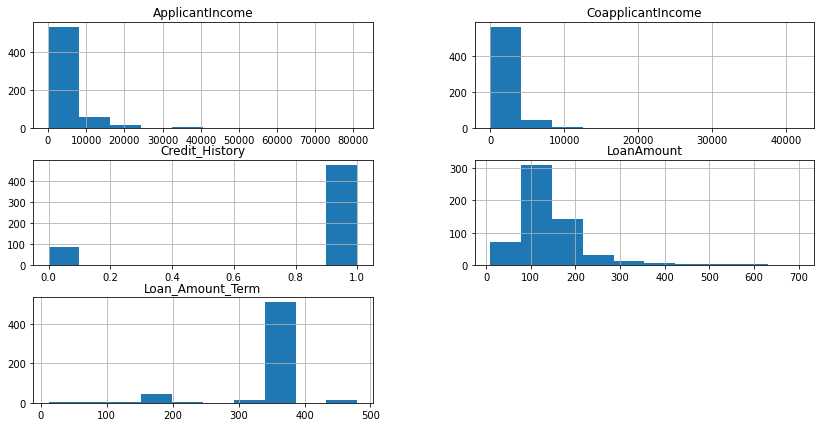

In [312]:
#Continuous
loan_df.hist(figsize = [14,7])

Observations
1. Maximum chances of getting loan for those whose applicant income is less than 10000.
2. Maximum chances of getting loan for those whose coapplicant incom is less than 500.
3. Maximum chances of getting loan for those whose Loan amount lies between 75 and 150.



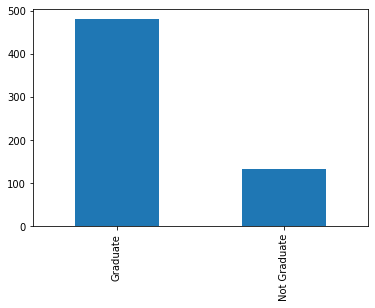

In [313]:
#Categorical
loan_df['Education'].value_counts().plot.bar()

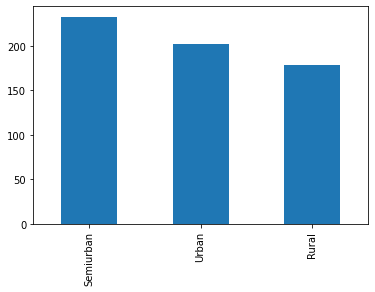

In [314]:
loan_df['Property_Area'].value_counts().plot.bar()

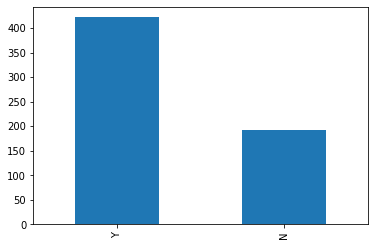

In [315]:
loan_df['Loan_Status'].value_counts().plot.bar()

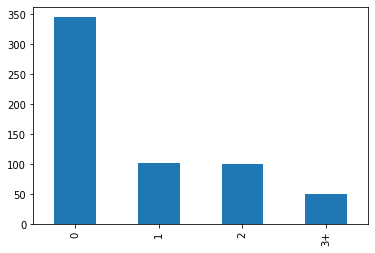

In [316]:
loan_df['Dependents'].value_counts().plot.bar()

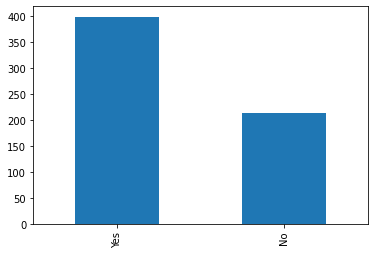

In [317]:
loan_df['Married'].value_counts().plot.bar()

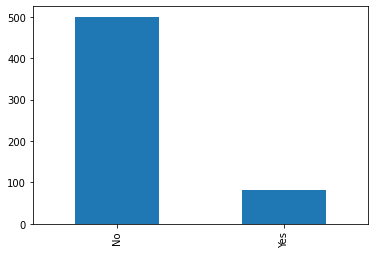

In [318]:
loan_df['Self_Employed'].value_counts().plot.bar()

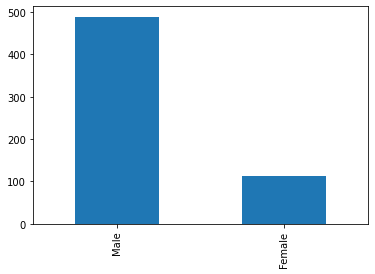

In [319]:
loan_df['Gender'].value_counts().plot.bar()

### Observations
1. Maximum chances of approving loans for graduated individuals.
2. Loan approved to those who are not dependent.
3. Loan approved to married more than unmarried.
4. Maximum chances of approving loan for those who are not self employed.
5. Maximum chances of approving loan for males than females.

**Problem 4 - Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations.**

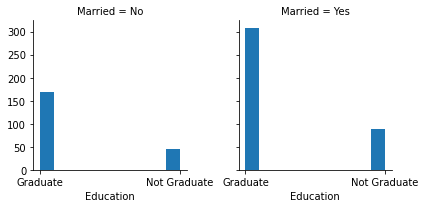

In [320]:
gph = sn.FacetGrid(loan_df, col='Married',height=3,aspect=1)
gph = gph.map(plt.hist,'Education')

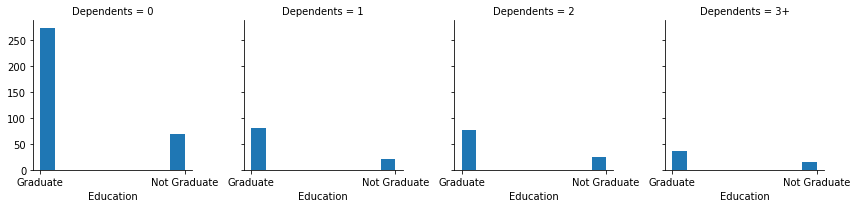

In [321]:
gph = sn.FacetGrid(loan_df, col='Dependents', height=3,aspect=1)
gph = gph.map(plt.hist,'Education')

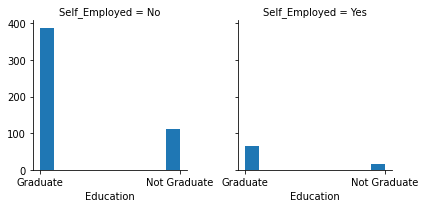

In [322]:
gph = sn.FacetGrid(loan_df, col='Self_Employed',height=3,aspect=1)
gph = gph.map(plt.hist,'Education')

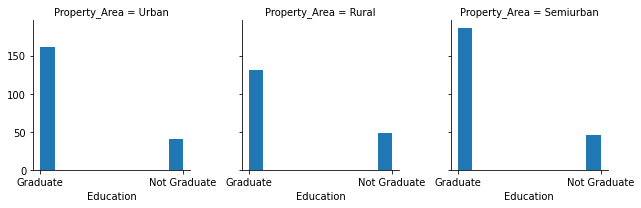

In [323]:
gph = sn.FacetGrid(loan_df, col='Property_Area',height=3,aspect=1)
gph = gph.map(plt.hist,'Education')

### Observations
1. More chances of getting loans who are married as well as graduated.
2. More chances of getting loan for those who are graduated and not dependent.
3. More chances of getting loan for graduated and who are not self-employed.


**Problem 5 - Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc.**



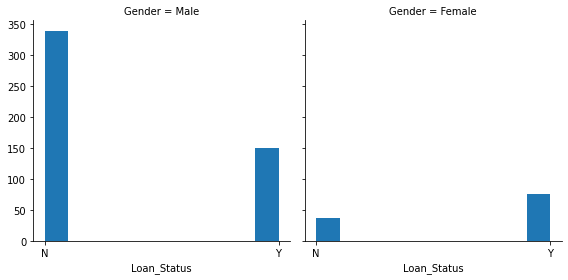

In [324]:
gph = sn.FacetGrid(loan_df, col='Gender', height=4)
gph = gph.map(plt.hist, 'Loan_Status')

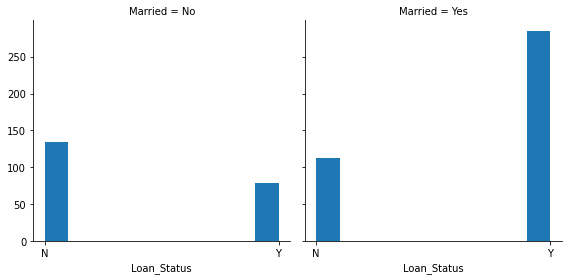

In [325]:
gph = sn.FacetGrid(loan_df, col='Married', height=4)
gph = gph.map(plt.hist, 'Loan_Status')

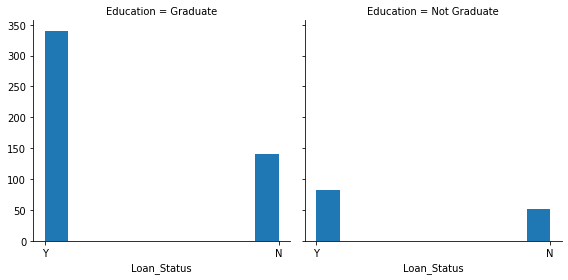

In [326]:
gph = sn.FacetGrid(loan_df, col='Education', height=4)
gph = gph.map(plt.hist, 'Loan_Status')

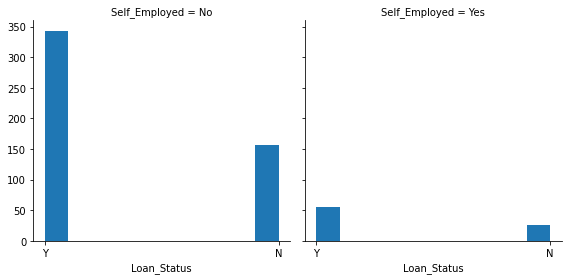

In [327]:
gph =sn.FacetGrid(loan_df, col='Self_Employed', height=4)
gph = gph.map(plt.hist, 'Loan_Status')

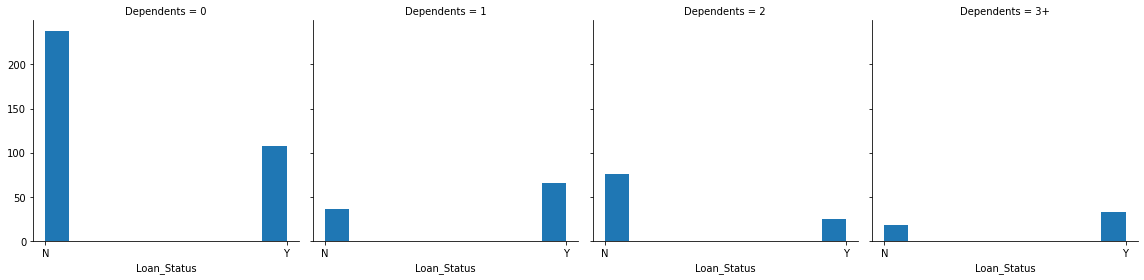

In [328]:
gph = sn.FacetGrid(loan_df, col='Dependents', height=4)
gph = gph.map(plt.hist, 'Loan_Status')

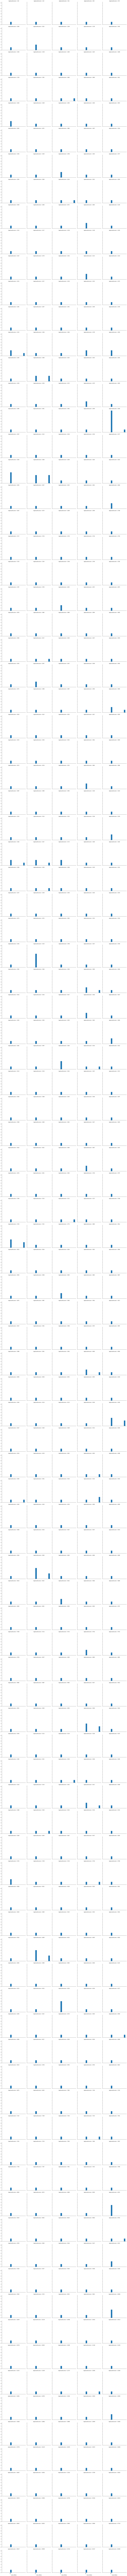

In [329]:
gph = sn.FacetGrid(loan_df,col = 'ApplicantIncome', col_wrap=5, height=4)
gph = gph.map(plt.hist, 'Loan_Status')

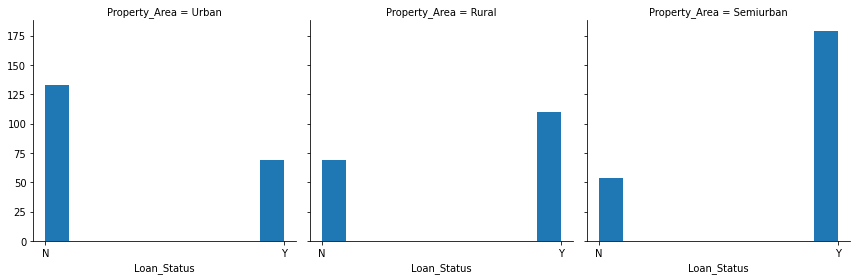

In [330]:
gph = sn.FacetGrid(loan_df, col='Property_Area', height=4)
gph = gph.map(plt.hist, 'Loan_Status')


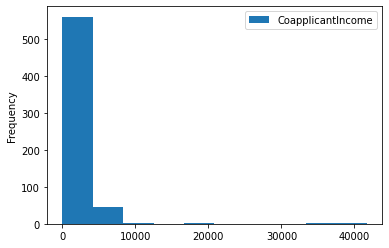

In [331]:
loan_df.plot.hist(x = 'Loan_Status', y = 'CoapplicantIncome')

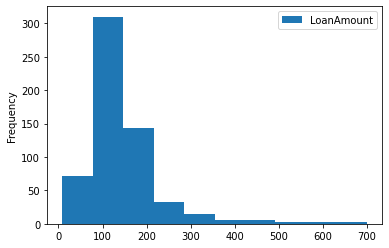

In [332]:
loan_df.plot.hist(x='Loan_Status', y='LoanAmount')

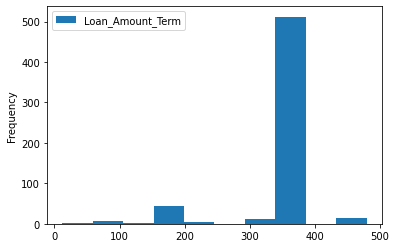

In [333]:
loan_df.plot.hist(x='Loan_Status', y='Loan_Amount_Term')

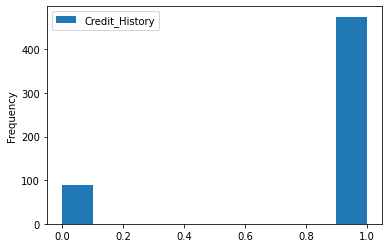

In [334]:
loan_df.plot.hist(x='Loan_Status', y='Credit_History')

### Observations
1. Males have higher Loan_Status than females.
2. Married individuals have higher loan_status than unmarried.
3. Graduated individuals have higher loan status.
4. Maximum loan status for those who are not self-employed.
5. Higher loan status for independent individuals.


**Problem 6 - How is the class distribution (Y/N) in Label(Target) Variable ?**

**Problem 7 - Identify the Independent Variables that have missing values.**

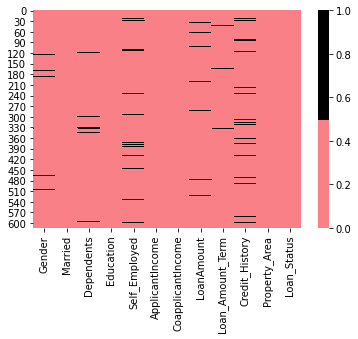

In [335]:
#Missing data heatmap
cols = loan_df.columns[:30] 
colours = ['#fa8088','#000000']     # black is missing & pink is not missing.
sn.heatmap(loan_df[cols].isnull(), cmap=sn.color_palette(colours))

In [336]:
#Missing data percentage list
for col in loan_df.columns:
    pct_missing = np.mean(loan_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Gender - 2.0%
Married - 0.0%
Dependents - 2.0%
Education - 0.0%
Self_Employed - 5.0%
ApplicantIncome - 0.0%
CoapplicantIncome - 0.0%
LoanAmount - 4.0%
Loan_Amount_Term - 2.0%
Credit_History - 8.0%
Property_Area - 0.0%
Loan_Status - 0.0%


**Problem 8 - Handle missing values appropriately , explain the technique applied for each case.**

In [392]:
#Drop the observation
val_missing = loan_df[loan_df['num_missing'] > 35].index
loan_df_less_missing_rows = loan_df.drop(val_missing, axis=0)
loan_df.shape
loan_df_less_missing_rows.shape

(614, 13)

In this technique, missing values are removed from the data based on some criteria.

In [393]:
#Drop the feature
cols_to_drop = ['Credit_History']
loan_df_less_Credit_History = loan_df.drop(cols_to_drop, axis=1)
loan_df.shape
loan_df_less_Credit_History.shape

(614, 12)

In this technique, those columns are removed which contains maximum missing values. In this dataset, Credit_History contains maximum missing values.

In [408]:
#Impute the observation - Replacing missing values with the median.
loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median())
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].median())
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].median())
loan_df['Self_Employed'] = loan_df['Self_Employed'].fillna(method='ffill')
loan_df['Dependents'] = loan_df['Dependents'].fillna(method='ffill')
loan_df['Married'] = loan_df['Married'].fillna(method='ffill')
loan_df['Gender'] = loan_df['Gender'].fillna(method='ffill')
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,num_missing
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,0.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.0


In this technique, column having highest missing values are removed by replacing values with mean or median.

**Problem 9 - Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles).**



In [409]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,num_missing
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.0
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.0
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.0
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.0
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.0
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,0.0
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,0.0
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,0.0


In [410]:
#IQR for 0-25%
Q1 = loan_df.quantile(0)
Q3 = loan_df.quantile(0.25)
IQR = Q3-Q1
IQR

ApplicantIncome      2727.50
CoapplicantIncome       0.00
LoanAmount             91.25
Loan_Amount_Term      348.00
Credit_History          1.00
num_missing             0.00
dtype: float64

In [411]:
((loan_df > (Q3 + 1.5 * IQR)) |(loan_df < (Q1 - 1.5 * IQR)))

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,num_missing
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,True,True,False,False,False,False,True,False,False,False,False,False,False
612,True,False,False,False,False,False,False,False,False,False,False,False,False


In [412]:
#IQR of 25-75%
Q1 = loan_df.quantile(0.25)
Q3 = loan_df.quantile(0.50)
IQR = Q3-Q1
IQR

ApplicantIncome       935.00
CoapplicantIncome    1188.50
LoanAmount             27.75
Loan_Amount_Term        0.00
Credit_History          0.00
num_missing             0.00
dtype: float64

In [413]:
((loan_df > (Q3 + 1.5 * IQR)) |(loan_df < (Q1 - 1.5 * IQR)))

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,num_missing
0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,True,True,False,False,False,False,False
611,True,False,False,False,False,False,True,False,False,False,False,False,False
612,True,False,False,False,False,False,True,False,False,False,False,False,False


In [414]:
#IQR of 50-75%
Q1 = loan_df.quantile(0.50)
Q3 = loan_df.quantile(0.75)
IQR = Q3-Q1
IQR

ApplicantIncome      1982.50
CoapplicantIncome    1108.75
LoanAmount             36.75
Loan_Amount_Term        0.00
Credit_History          0.00
num_missing             0.00
dtype: float64

In [415]:
((loan_df > (Q3 + 1.5 * IQR)) |(loan_df < (Q1 - 1.5 * IQR)))

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,num_missing
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,True,False,False,False,False,False,False
610,False,False,False,False,False,False,True,True,False,False,False,False,False
611,False,False,False,False,False,False,True,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [416]:
#IQR of 75-100%
Q1 = loan_df.quantile(0.75)
Q3 = loan_df.quantile(0.1)
IQR = Q3-Q1
IQR

ApplicantIncome     -3578.90
CoapplicantIncome   -2297.25
LoanAmount            -92.45
Loan_Amount_Term      -60.00
Credit_History         -1.00
num_missing             0.00
dtype: float64

In [417]:
((loan_df > (Q3 + 1.5 * IQR)) |(loan_df < (Q1 - 1.5 * IQR)))

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,num_missing
0,True,True,True,False,False,False,True,True,False,False,False,False,False
1,True,True,True,False,False,False,True,True,False,False,False,False,False
2,True,True,True,False,False,False,True,True,False,False,False,False,False
3,True,True,True,False,False,False,True,True,False,False,False,False,False
4,True,True,True,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,True,True,True,False,False,False,True,True,False,False,False,False,False
610,True,True,True,False,False,False,True,True,False,False,False,False,False
611,True,True,True,False,False,False,True,True,False,False,False,False,False
612,True,True,True,False,False,False,True,True,False,False,False,False,False


**Problem 10 - Use Box-Plot chart to represent the Outliers for each Independent Variable.**

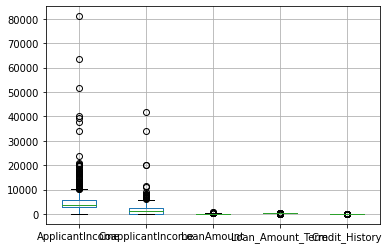

In [418]:
loan_df.boxplot(column=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])

**Problem 11 - Perform treatment of these Outliers using appropriate techniqies.Explain your approach.**

**Problem 12 **




**Step 1 - Perform Label Encoding on Target Variable (Loan_Status).**

In [0]:
loan_df_cat = loan_df.copy()

In [0]:
le = LabelEncoder()
loan_df_cat['enc_Loan_Status'] = le.fit_transform(loan_df_cat['Loan_Status'])

In [437]:
loan_df_cat.groupby(['Loan_Status','enc_Loan_Status']).size().reset_index().rename(columns={0:'count'})

,Loan_Status,enc_Loan_Status,count
0,N,0,192
1,Y,1,422


**Step 2 - Perform Label Encoding on Categorical Independent Variables.**

**Label encoding of categorical independent variables**

In [0]:
le = LabelEncoder()
loan_df_cat['enc_Education'] = le.fit_transform(loan_df_cat['Education'])

In [399]:
loan_df_cat.groupby(['Education','enc_Education']).size().reset_index().rename(columns={0:'count'})

,Education,enc_Education,count
0,Graduate,0,480
1,Not Graduate,1,134


In [0]:
le = LabelEncoder()
loan_df_cat['enc_Property_Area'] = le.fit_transform(loan_df_cat['Property_Area'])

In [401]:
loan_df_cat.groupby(['Property_Area','enc_Property_Area']).size().reset_index().rename(columns={0:'count'})

,Property_Area,enc_Property_Area,count
0,Rural,0,179
1,Semiurban,1,233
2,Urban,2,202


In [0]:
le = LabelEncoder()
loan_df_cat['enc_Loan_Status'] = le.fit_transform(loan_df_cat['Loan_Status'])

In [403]:
loan_df_cat.groupby(['Loan_Status','enc_Loan_Status']).size().reset_index().rename(columns={0:'count'})

,Loan_Status,enc_Loan_Status,count
0,N,0,192
1,Y,1,422


**What is the shape of dataframe post Categorical Encoding ?**

In [404]:
loan_df_cat.shape

(614, 16)

**Carry out Correlation analysis on this dataframe. Plot using HeatMap.**

In [405]:
corr = loan_df_cat.corr()
corr.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,num_missing,enc_Loan_Status,enc_Education,enc_Property_Area
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.018615,NaN,-0.004710,-0.140760,-0.009500
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,0.011134,NaN,-0.059187,-0.062290,0.010522
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.001463,NaN,-0.037318,-0.171133,-0.045792
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.000445,NaN,-0.021268,-0.078784,-0.078748
Credit_History,-0.018615,0.011134,-0.001463,0.000445,1.000000,NaN,0.540556,-0.073658,0.001963


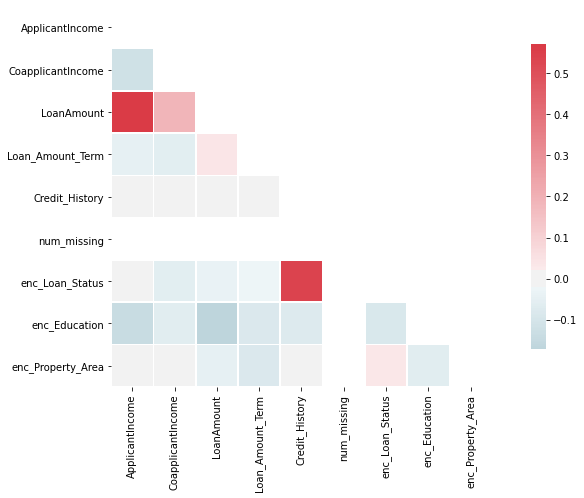

In [406]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(14, 7))

cmap = sn.diverging_palette(220, 10, as_cmap=True)

svm = sn.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths= .8, cbar_kws={"shrink": .8})
figure = svm.get_figure()

**Identify the variables that have strong correlation using Label Encoding( Correlation Coefficient > 0.5 or <0.5)**

From the above heatmap we can conclude that -
1. LoanAmount and ApplicationIncome are strongly correlated,
2. enc_Loan_Status and Credit_History are strongly correlated.

**Step 3 - Perform One Hot Encoding on Categorical Independent Variables.**

In [0]:
ohe_loan_df = loan_df.copy()

In [0]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [0]:
enc_Education = pd.DataFrame(ohe.fit_transform(ohe_loan_df[['Education']]).toarray())

In [382]:
enc_Education

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
609,1.0,0.0
610,1.0,0.0
611,1.0,0.0
612,1.0,0.0


In [0]:
enc_Property_Area = pd.DataFrame(ohe.fit_transform(ohe_loan_df[['Property_Area']]).toarray())

In [384]:
enc_Property_Area

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
609,1.0,0.0,0.0
610,1.0,0.0,0.0
611,0.0,0.0,1.0
612,0.0,0.0,1.0


In [0]:
enc_Loan_Status = pd.DataFrame(ohe.fit_transform(ohe_loan_df[['Loan_Status']]).toarray())

In [386]:
enc_Loan_Status

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
609,0.0,1.0
610,0.0,1.0
611,0.0,1.0
612,0.0,1.0


**What is the shape of dataframe post OHE Encoding ?**

In [387]:
ohe_loan_df.shape

(614, 13)

**Carry out Correlation analysis on this dataframe. Plot using HeatMap.**

In [390]:
ohe_loan_df.corr().head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,num_missing
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.018615,NaN
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,0.011134,NaN
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.001463,NaN
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.000445,NaN
Credit_History,-0.018615,0.011134,-0.001463,0.000445,1.000000,NaN


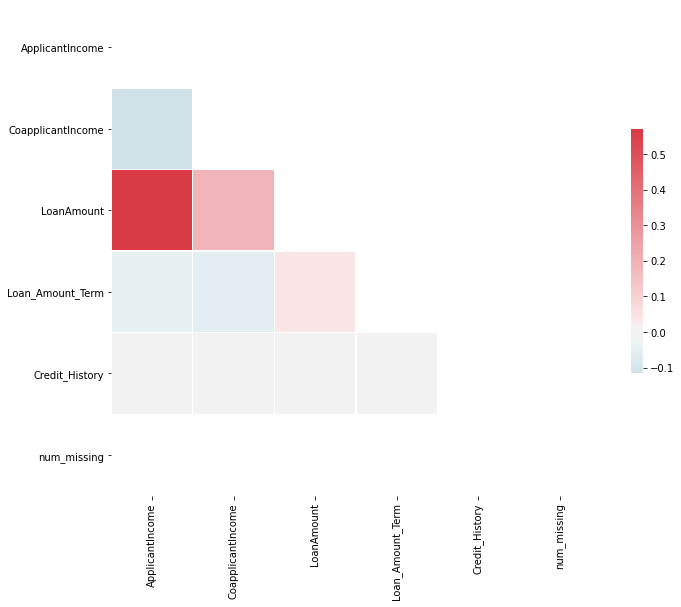

In [391]:
corr_ohe = ohe_loan_df.corr()

mask = np.zeros_like(corr_ohe, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
svm = sn.heatmap(corr_ohe, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

**Identify the variables that have strong correlation using OHE ( Correlation Coefficient > 0.5 or <0.5)**

From the above heatmap, we can conclude that LoanAmount and ApplicantIncome are strongly correlated.